# **DATA 144 FINAL PROJECT**

## Initialization

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

## Read in datasets

In [ ]:
df1 = pd.read_csv('https://raw.githubusercontent.com/coryng5/data144project/main/vgsales.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/coryng5/data144project/main/all_games.csv')

In [ ]:
df1.head(2)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24


In [ ]:
df2.head(2)

,name,platform,release_date,summary,meta_score,user_review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",99,9.1
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",As most major publishers' development efforts ...,98,7.4


## Data Preprocessing

In [ ]:
df3 = df2.copy()
df3['platform'] = df3['platform'].replace({' Nintendo 64': 'N64', ' PlayStation': 'PS', ' PlayStation 3': 'PS3', ' Dreamcast': 'DC', 
                         ' Xbox 360': 'X360',' Xbox One': 'XOne',' PlayStation 2': 'PS2', ' PlayStation 4': 'PS4', 
                        ' GameCube': 'GC', ' Xbox':'XB', ' Wii U': 'WiiU', ' Game Boy Advance': 'GBA', 
                        ' 3DS': '3DS', ' Wii':'Wii', ' PC': 'PC', ' DS':'DS', ' PlayStation Vita':'PSV',
                        ' PSP': 'PSP'})
df3['name'] = df3['name'].str.lower()
df1['Name'] = df1['Name'].str.lower() #adds 200 rows

merged = pd.merge(df3, df1, how='inner',
                  left_on=['name', 'platform'],
                  right_on=['Name', 'Platform'])
merged = merged.drop(['Name','Platform'],axis=1)
merged.head(2)

,name,platform,release_date,summary,meta_score,user_review,Rank,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,the legend of zelda: ocarina of time,N64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",99,9.1,95,1998.0,Action,Nintendo,4.10,1.89,1.45,0.16,7.60
1,tony hawk's pro skater 2,PS,"September 20, 2000",As most major publishers' development efforts ...,98,7.4,226,2000.0,Sports,Activision,3.05,1.41,0.02,0.20,4.68


In [ ]:
violence_df = df1.query("Genre == 'Action' or Genre =='Shooter' or Genre == 'Fighting'")
pivot = violence_df.groupby('Year')['NA_Sales'].sum()

# Pivot shows the North American sales among action/shooter/fighting genre video games
pivot.head()

Year
1980.0     7.60
1981.0    23.23
1982.0     9.62
1983.0     3.12
1984.0    28.59
Name: NA_Sales, dtype: float64

In [ ]:
import re
df_mass_shootings_raw = pd.read_csv("https://raw.githubusercontent.com/coryng5/data144project/main/mass_shooting_events_stanford_msa_release_06142016.csv")
df_mass_shootings = df_mass_shootings_raw.iloc[:306,:15]
def helper1(year):
  return int(re.findall(r'\b\d{4}\b', (str(year)))[0])
df_mass_shootings['Year'] = df_mass_shootings['Date - Detailed'].apply(helper1)

# Pivot2 shows the number of shooting fatalities in the US
pivot2 = df_mass_shootings.groupby('Year')['Total Number of Fatalities'].sum()
pivot2.head()

Year
1966    22.0
1971     2.0
1972    10.0
1974     4.0
1976     8.0
Name: Total Number of Fatalities, dtype: float64

In [ ]:
df_mass_shootings.head(2)

,CaseID,Title,Location,City,State,Latitude,Longitude,Number of Victim Fatalities,Total Number of Fatalities,Number of Victims Injured,Total Number of Victims,Description,Date,Day of Week,Date - Detailed,Year
0,1.0,University of Texas at Austin,"Austin, Texas",Austin,Texas,30.198887,-97.844159,16.0,17.0,32.0,48.0,"On August 1, 1966, a 25-year-old engineering s...",8/1/1966,Monday,"Monday, August 01, 1966",1966
1,2.0,Rose-Mar College of Beauty,"Mesa, Arizona",Mesa,Arizona,33.422687,-111.816320,5.0,5.0,1.0,6.0,"On November 12, 1966, an 18-year-old high scho...",11/12/1966,Saturday,"Saturday, November 12, 1966",1966


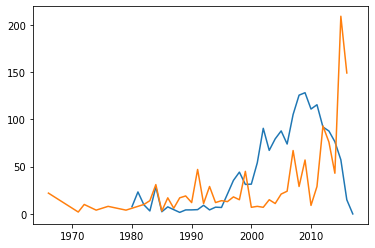

In [ ]:
#Unfinished EDA
plt.plot(pivot)
plt.plot(pivot2)

# Note: Seems like both lines follow the same upwards trend (The blue goes down probably because not enough sales data are collected)

## EDA

In [ ]:
#PART 1- EDA below
merged.describe()
# note: some instances have 0 sales in some countries lets look into this--> looked it up, seems pretty normal, games are old, and sales in millions 
# what is rank mean? it doesn't seem to correlate with overall sales, can we just treat it as an index/primary key going forward?
# will create some visualisations later to explore some trends (eg: sales by genre )



,meta_score,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,6388.000000,6388.000000,6281.000000,6388.000000,6388.000000,6388.000000,6388.000000,6388.000000
mean,72.942079,6576.392924,2006.950963,0.413471,0.246334,0.069595,0.085006,0.814634
std,11.678624,4575.351986,4.204920,1.009289,0.702672,0.296297,0.278068,2.029827
min,22.000000,1.000000,1988.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,66.000000,2563.750000,2004.000000,0.060000,0.020000,0.000000,0.010000,0.110000
50%,74.000000,5848.000000,2007.000000,0.150000,0.060000,0.000000,0.020000,0.300000
75%,81.000000,10155.500000,2010.000000,0.410000,0.220000,0.020000,0.070000,0.800000
max,99.000000,16585.000000,2016.000000,41.490000,29.020000,6.500000,10.570000,82.740000


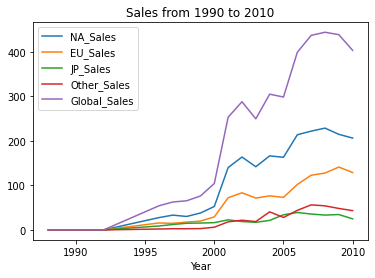

In [ ]:
# Define list of sales columns for use later 
sales = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]

# Group by year and sum the sales in each region 
grouped_year_sale = merged.groupby('Year').sum()[sales].reset_index()
grouped_year_sale = grouped_year_sale[grouped_year_sale['Year']<= 2010].set_index('Year')

grouped_year_sale.plot.line();
plt.title('Sales from 1990 to 2010');

# TAKEAWAY: New games achieve better sales (makes sense since sales are calculated over time)

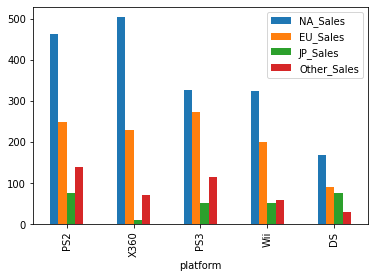

In [ ]:
# Best performing platforms (Top 5)
# Drop global sales column because its redundant info, would rather zoom in on the region sales 

merged.groupby('platform')[sales].sum().sort_values('Global_Sales', ascending=False).iloc[:5,:].drop(columns='Global_Sales').plot.bar();


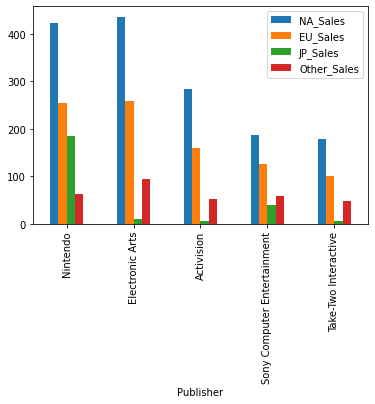

In [ ]:
# Best performing publishers (Top 5)
# Drop global sales column because its redundant info, would rather zoom in on the region sales 

# TAKEAWAY: Among JP_Sales, Nintendo does way better than other publishers 
# Do we wanna explore why Nintendo does so much better in JP? We could but if our main focus is to look into Video Games vs Shooting in North America, then looking into Japanese trends are a waste of time 

merged.groupby('Publisher')[sales].sum().sort_values('Global_Sales', ascending=False).iloc[:5,:].drop(columns='Global_Sales').plot.bar();


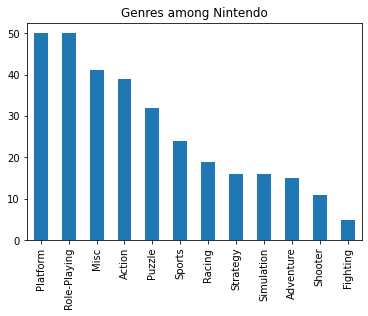

In [ ]:
merged[merged['Publisher'] == 'Nintendo']['Genre'].value_counts().plot.bar();
plt.title('Genres among Nintendo');

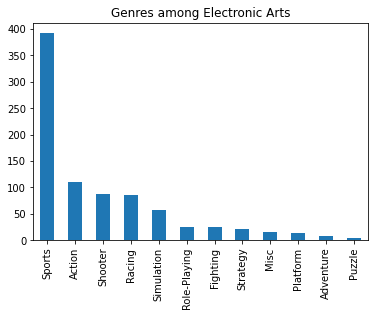

In [ ]:
merged[(merged['Publisher'] == 'Electronic Arts')]['Genre'].value_counts().plot.bar();
plt.title('Genres among Electronic Arts');

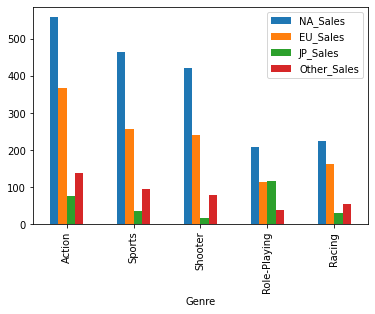

In [ ]:
merged.groupby('Genre')[sales].sum().sort_values('Global_Sales', ascending=False).iloc[:5,:].drop(columns='Global_Sales').plot.bar();

# TAKEAWAY: NA_Sales perform the best on Action, Sports, and Shooter genres
# Refer to line graph above of shooting fatalities vs. action/shooter/fighter VG genres


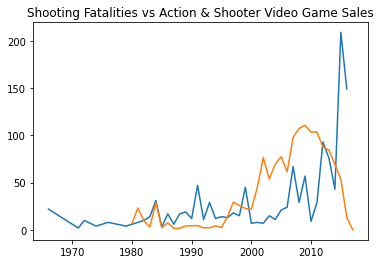

In [ ]:
# Using the same code for the line graph above, but only using 'Action' and 'Shooter' genres since those are among the top3 genres in NA
#we used the wrong df for the first plot
violence_df2 = df1.query("Genre == 'Action' or Genre =='Shooter'")

# Pivot shows the North American sales among action/shooter/fighting genre video games. Table already created above.
plt.plot(pivot2);
plt.plot(violence_df2.groupby('Year')['NA_Sales'].sum());
plt.title('Shooting Fatalities vs Action & Shooter Video Game Sales');

#TAKEAWAY: Both lines are much closer to each other as compared to the line graph above (which means that we dont have to include the 'Fighting' genre)

In [ ]:
violence_df = df1.query("Genre == 'Action' or Genre =='Shooter' or Genre == 'Fighting'")
violence_df = violence_df.query("Genre == 'Action' or Genre =='Shooter' or Genre == 'Fighting'")

pivot = violence_df.groupby('Year')['NA_Sales'].sum()

pp = pd.DataFrame(pivot2).join(pd.DataFrame(pivot), how='outer').fillna(0)
stats.pearsonr(pp['Total Number of Fatalities'], pp['NA_Sales'])

NameError: ignored

In [ ]:
sns.lmplot(x='Total Number of Fatalities', y='NA_Sales', data=pp);

In [ ]:
# Added sentiment analysis but it seems like most summaries are positive

from textblob import TextBlob
merged["sentiment_score"] = merged["summary"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
merged["sentiment"] = np.select([merged["sentiment_score"] < 0, merged["sentiment_score"] == 0, merged["sentiment_score"] > 0],
                           ['neg', 'neu', 'pos'])

In [ ]:
# Among the negative sentiments, these are the top 5 genres

sentiment_genre = merged.groupby(['sentiment', 'Genre']).count().reset_index()[['sentiment', 'Genre', 'name']].rename(columns={"name": "count"})

barplot_df = sentiment_genre[sentiment_genre['sentiment']=='neg'].sort_values('count', ascending=False).iloc[:5, :]
sns.barplot(data=barplot_df, x='Genre', y='count');

# TAKEAWAY: 'Action' and 'Shooter' genres appear once again. They are describe within 'summary' to be have negative sentiment, follow close trends as shootings (as seen in line graphs), and are the top selling genres in North America

KeyError: ignored

In [ ]:
merged['sentiment'].value_counts()

KeyError: ignored

In [ ]:
# from scipy import stats
# sns.lmplot(x="meta_score", y='JP_Sales', data=merged);
# sns.lmplot(x="meta_score", y='NA_Sales', data=merged);
# sns.lmplot(x="meta_score", y='EU_Sales', data=merged);
# sns.lmplot(x="meta_score", y='Other_Sales', data=merged);



## Additional Preprocessing

In [ ]:
# Part2 - PREPROCESS # features to add possibly: online/offline; content rating; portable/not 

#2.1 : create a feature: is_portable 
df_preprocess = merged.copy()
df_preprocess['is_portable'] = df_preprocess['platform'].replace({'N64':0 , 'PS': 0, 'PS3':0 , 'DC':1 , 
                         'X360':0 ,'XOne': 0,'PS2':0 , 'PS4':0 , 
                        'GC':0 , 'XB':0, 'WiiU':0 , 'GBA':1 , 
                        '3DS':1 , 'Wii':0, 'PC':1 , 'DS':1, 'PSV':1,
                        'PSP': 1})

#2.3 - use regex to get month out of date - eg: more sales during christmas month, etc
df_preprocess['month'] = df_preprocess['release_date'].str.extract(r'([A-Z]{1}[a-z]*)')

#merged['1st'] = merged['name'].str.split().str[-2:].str[0]
#merged['2nd'] = merged['name'].str.split().str[-2:].str[1]



#2.2- ADDING esrb COLUMN -- did not end up working- lowkey mad hard, may be able to fix w/ regex but would be v manual n long 
#df_esrb = pd.read_csv('https://raw.githubusercontent.com/coryng5/data144project/main/Video_games_esrb_rating.csv')
#df_esrb = df_esrb.loc[:,['title','esrb_rating']]
#df_esrb['1st'] = df_esrb['title'].str.split().str[-2:].str[0]
#df_esrb['2nd'] = df_esrb['title'].str.split().str[-2:].str[1]

#merged1 = pd.merge(merged, df_esrb, how='inner', left_on=['1st','2nd'], right_on=['1st','2nd'])
#merged[(merged['1st']=='Auto') & (merged['2nd']=='V')]

#drop rows with user_review = "tbd"
df_preprocess = df_preprocess[df_preprocess['user_review']!='tbd']
df_preprocess['user_review'] = df_preprocess['user_review'].astype(float)

In [ ]:
#More preprocessing for publisher
top5_list = df_preprocess['Publisher'].value_counts(ascending = False)[:5].index.tolist()
df_preprocess['top_5_publisher'] = df_preprocess['Publisher'].isin(top5_list).astype(int)

In [ ]:
#2.5 - use regex to get year out of release date because orginal Year column has some missing values
df_preprocess['year']=df_preprocess['release_date'].apply(helper1)
df_preprocess = df_preprocess.drop(['Year'],axis=1)

#Drop missing values
df_preprocess = df_preprocess.dropna()

#2.2 : create feature: is_characterbased ; are you playing as yourself or as a character
df_preprocess['is_not_characterbased'] = df_preprocess.summary.str.contains("\s{1}you\s{1}|\s{1}your\s{1}").astype(int)


In [ ]:
#Get dummy variables
df_cleaned = pd.get_dummies(df_preprocess, columns=['platform','month','Genre'])
print(len(df_cleaned))
df_cleaned.head(2)

6006


,name,release_date,summary,meta_score,user_review,Rank,Publisher,NA_Sales,EU_Sales,JP_Sales,...,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,the legend of zelda: ocarina of time,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",99,9.1,95,Nintendo,4.10,1.89,1.45,...,0,0,0,0,0,0,0,0,0,0
1,tony hawk's pro skater 2,"September 20, 2000",As most major publishers' development efforts ...,98,7.4,226,Activision,3.05,1.41,0.02,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
df_cleaned.columns

Index(['name', 'release_date', 'summary', 'meta_score', 'user_review', 'Rank',
       'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales', 'is_portable', 'top_5_publisher', 'year',
       'is_not_characterbased', 'platform_3DS', 'platform_DC', 'platform_DS',
       'platform_GBA', 'platform_GC', 'platform_N64', 'platform_PC',
       'platform_PS', 'platform_PS2', 'platform_PS3', 'platform_PS4',
       'platform_PSP', 'platform_PSV', 'platform_Wii', 'platform_WiiU',
       'platform_X360', 'platform_XB', 'platform_XOne', 'month_April',
       'month_August', 'month_December', 'month_February', 'month_January',
       'month_July', 'month_June', 'month_March', 'month_May',
       'month_November', 'month_October', 'month_September', 'Genre_Action',
       'Genre_Adventure', 'Genre_Fighting', 'Genre_Misc', 'Genre_Platform',
       'Genre_Puzzle', 'Genre_Racing', 'Genre_Role-Playing', 'Genre_Shooter',
       'Genre_Simulation', 'Genre_Sports', 'Genre_Strat

## Train/Test Split

In [ ]:
features_list = ['meta_score', 'user_review','is_portable', 'top_5_publisher', 'year',
       'is_not_characterbased', 'platform_3DS', 'platform_DC', 'platform_DS',
       'platform_GBA', 'platform_GC', 'platform_N64', 'platform_PC',
       'platform_PS', 'platform_PS2', 'platform_PS3', 'platform_PS4',
       'platform_PSP', 'platform_PSV', 'platform_Wii', 'platform_WiiU',
       'platform_X360', 'platform_XB', 'platform_XOne', 'month_April',
       'month_August', 'month_December', 'month_February', 'month_January',
       'month_July', 'month_June', 'month_March', 'month_May',
       'month_November', 'month_October', 'month_September', 'Genre_Action',
       'Genre_Adventure', 'Genre_Fighting', 'Genre_Misc', 'Genre_Platform',
       'Genre_Puzzle', 'Genre_Racing', 'Genre_Role-Playing', 'Genre_Shooter',
       'Genre_Simulation', 'Genre_Sports', 'Genre_Strategy']
X = df_cleaned.loc[:, features_list]
y = df_cleaned['Global_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## Models

What Models to use: Linear regression, CV decision tree regressor, gradient boosting regressor, CV random forest regressor, neural network, stacking

In [ ]:
scores = list()
labels = list()

### Baseline Model

In [ ]:
#Baseline Model
y_train_mean = np.mean(y_train)
print(y_train_mean)
baseline_RMSE = np.sqrt(np.mean(((y_train_mean - y_test)**2)))
print(f'Baseline Test RMSE: {baseline_RMSE:.4f}')

0.8145647002854425
Baseline Test RMSE: 2.8098


### Linear Regression Model

In [ ]:
#Models: Linear regression, CV decision tree regressor, gradient boosting regressor, CV random forest regressor, neural network, stacking/blending?

from sklearn.linear_model import LinearRegression
#Linear Regression:
lin_reg_global = LinearRegression().fit(X_train,y_train)
lin_reg_global_predictions = lin_reg_global.predict(X_test)

lin_reg_RMSE = (mean_squared_error(y_test, lin_reg_global_predictions, squared=False))
print(f'Linear Regression Test RMSE: {lin_reg_RMSE:.4f}')

Linear Regression Test RMSE: 2.6842


In [ ]:
cvtest = KFold(n_splits=5, random_state=42, shuffle=True)
scores.append(cross_val_score(lin_reg_global, X, y, scoring='neg_root_mean_squared_error', cv=cvtest, n_jobs=-1, error_score='raise'))
labels.append('Lin Reg')

In [ ]:
print(f'Linear Regression Intercept: {lin_reg_global.intercept_:.4f}')
print('Linear Regression Coefficient:')
print(lin_reg_global.coef_)

Linear Regression Intercept: -119239108750.3491
Linear Regression Coefficient:
[ 5.10318313e-02 -1.24891070e-01  3.69344538e+11  4.33420993e-01
 -2.01750090e-03 -1.06380991e-01 -2.33979108e+11 -2.33979108e+11
 -2.33979108e+11 -2.33979108e+11  1.35365431e+11  1.35365431e+11
 -2.33979108e+11  1.35365431e+11  1.35365431e+11  1.35365431e+11
  1.35365431e+11 -2.33979108e+11 -2.33979108e+11  1.35365431e+11
  1.35365431e+11  1.35365431e+11  1.35365431e+11  1.35365431e+11
  1.11189869e+10  1.11189869e+10  1.11189869e+10  1.11189869e+10
  1.11189869e+10  1.11189869e+10  1.11189869e+10  1.11189869e+10
  1.11189869e+10  1.11189869e+10  1.11189869e+10  1.11189869e+10
 -2.72453090e+10 -2.72453090e+10 -2.72453090e+10 -2.72453090e+10
 -2.72453090e+10 -2.72453090e+10 -2.72453090e+10 -2.72453090e+10
 -2.72453090e+10 -2.72453090e+10 -2.72453090e+10 -2.72453090e+10]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


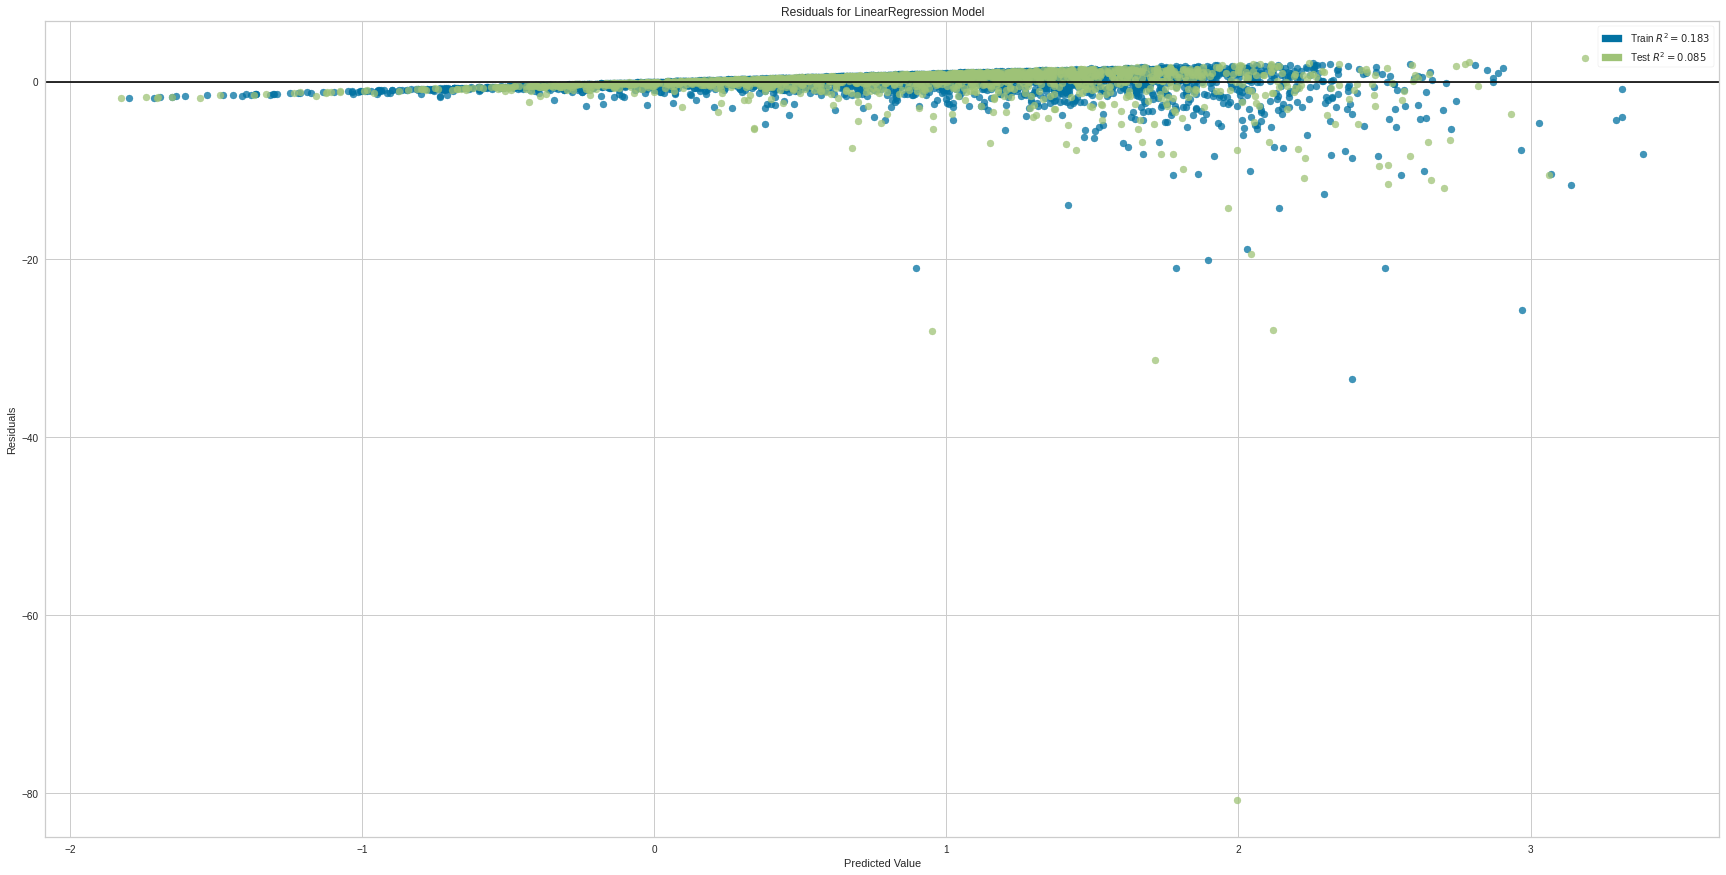

In [ ]:
from yellowbrick.regressor import ResidualsPlot
plt.figure(figsize = (30,15))

visualizer = ResidualsPlot(lin_reg_global, hist=False)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()


### Decision Tree Regressor Model

In [ ]:
#Cart Model
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

grid_values_cart = {'ccp_alpha': np.linspace(0, 0.10, 201)}
dtr = DecisionTreeRegressor()
dtr_cv = GridSearchCV(dtr, param_grid = grid_values_cart, scoring = 'neg_root_mean_squared_error', 
                      cv=KFold(n_splits=5, random_state=42, shuffle=True), verbose=1)
dtr_cv.fit(X_train, y_train)
print(dtr_cv.best_params_)

cart_predictions = dtr_cv.best_estimator_.predict(X_test)
cart_RMSE = mean_squared_error(y_test, cart_predictions, squared = False)
print(f'CART Test RMSE: {cart_RMSE:.4f}')

Fitting 5 folds for each of 201 candidates, totalling 1005 fits
{'ccp_alpha': 0.04}
CART Test RMSE: 2.8279


In [ ]:
cvtest = KFold(n_splits=5, random_state=42, shuffle=True)
scores.append(cross_val_score(GridSearchCV(dtr, param_grid = grid_values_cart, verbose=1),
                              X, y, scoring='neg_root_mean_squared_error', cv=cvtest, n_jobs=-1, error_score='raise'))
labels.append('DTR')

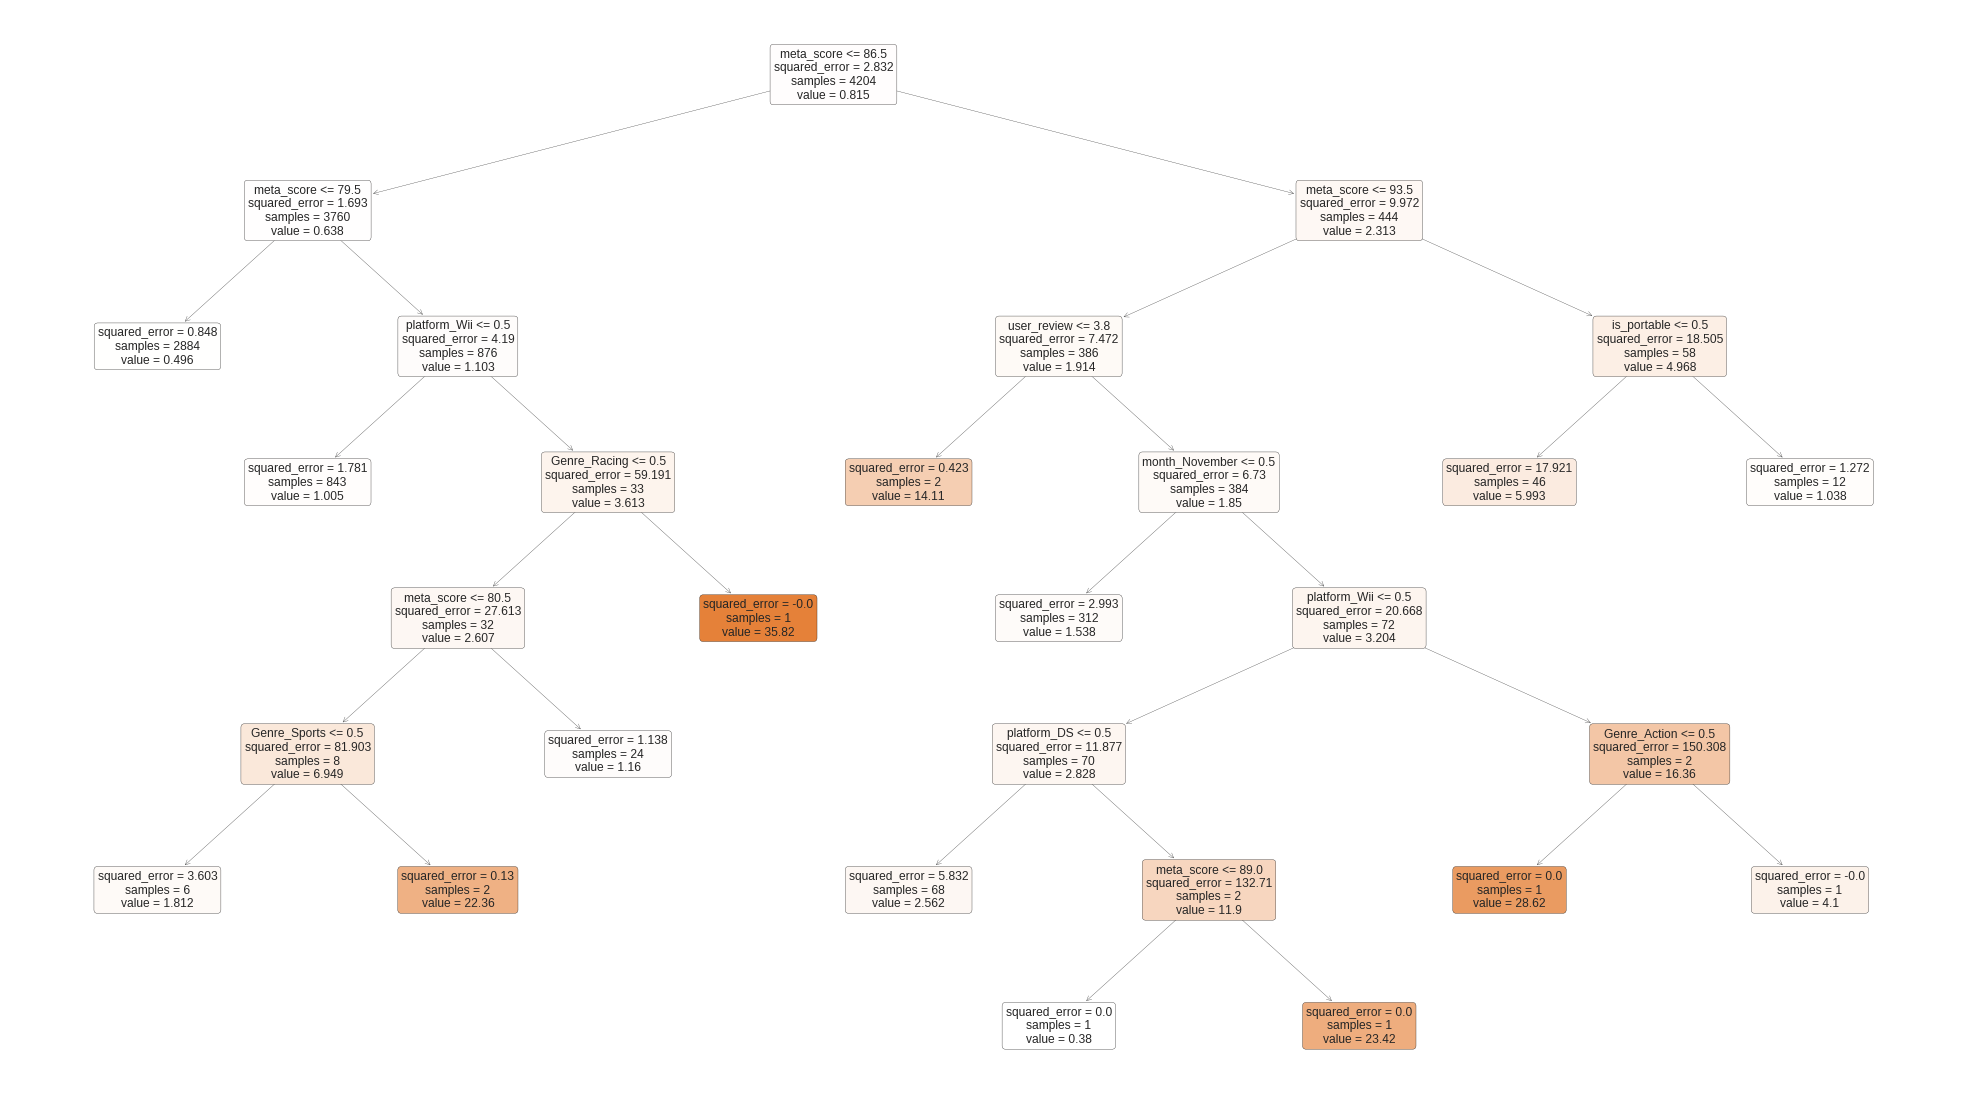

In [ ]:
#Cart Visualizations
from sklearn.tree import plot_tree
plt.figure(figsize = (35,20))
tree_visual = plot_tree(dtr_cv.best_estimator_, feature_names = X_train.columns, fontsize = 12,rounded=True, filled=True)
plt.show()


In [ ]:
cart_importance = pd.DataFrame({'Feature' : X_train.columns,  
              'Importance score': 100*dtr_cv.best_estimator_.feature_importances_}).round(2)
cart_importance.sort_values('Importance score', ascending=False)

,Feature,Importance score
0,meta_score,40.06
42,Genre_Racing,18.64
46,Genre_Sports,11.04
19,platform_Wii,9.97
36,Genre_Action,5.24
1,user_review,5.21
2,is_portable,4.07
8,platform_DS,2.95
33,month_November,2.83
34,month_October,0.00


### Random Forest Model

DO NOT RUN BELOW CODE AGAIN! TAKES A LONG TIME

In [ ]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

grid_values_rfr = {'max_features': np.linspace(1,len(X_train.columns),len(X_train.columns), dtype='int32')}
rfr = RandomForestRegressor(random_state = 42)
rfr_cv = GridSearchCV(rfr, param_grid = grid_values_rfr, scoring = 'neg_root_mean_squared_error', 
                      cv=KFold(n_splits=5, random_state=42, shuffle=True), verbose=1)
rfr_cv.fit(X_train,y_train)

print('Optimal features: '+str(rfr_cv.best_params_['max_features']))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Optimal features: 14


In [ ]:
cvtest = KFold(n_splits=5, random_state=42, shuffle=True)
scores.append(cross_val_score(GridSearchCV(rfr, param_grid = grid_values_rfr, verbose=1),
                              X, y, scoring='neg_root_mean_squared_error', cv=cvtest, n_jobs=-1, error_score='raise'))
labels.append('RFR')

KeyboardInterrupt: ignored

In [ ]:
rfr_pred = rfr_cv.best_estimator_.predict(X_test)
rfr_RMSE = mean_squared_error(y_test, rfr_pred, squared=False)

print(f'CV Random Forest Test RMSE: {rfr_RMSE:.4f}')

CV Random Forest Test RMSE: 2.6067


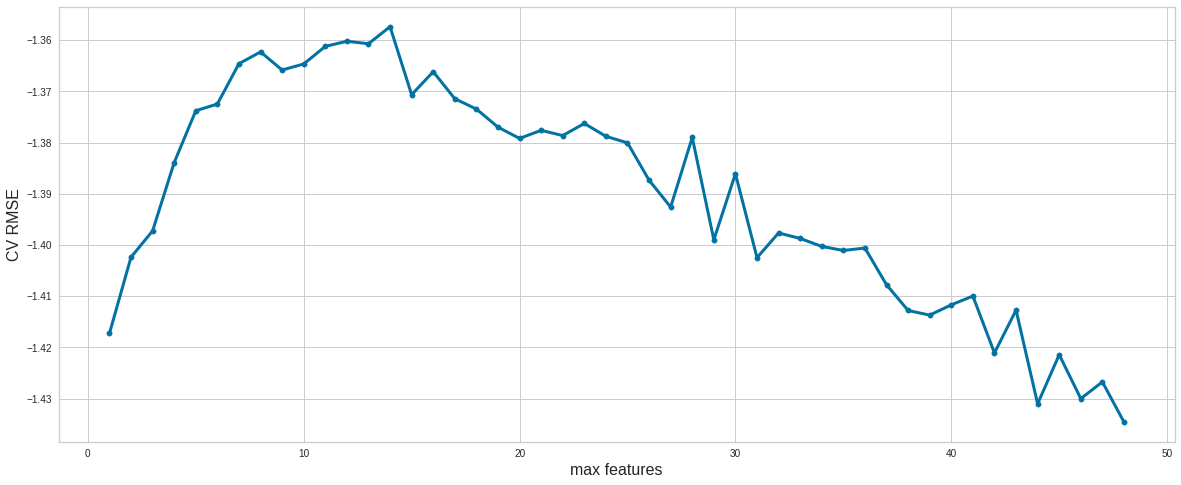

In [ ]:
max_features = rfr_cv.cv_results_['param_max_features'].data
RMSE_scores = rfr_cv.cv_results_['mean_test_score']

plt.figure(figsize=(20, 8))
plt.xlabel('max features', fontsize=16)
plt.ylabel('CV RMSE', fontsize=16)
plt.scatter(max_features, RMSE_scores, s=30)
plt.plot(max_features, RMSE_scores, linewidth=3)
plt.grid(True, which='both')

In [ ]:
rfr_importance = pd.DataFrame({'Feature' : X_train.columns,  
              'Importance score': 100*rfr_cv.best_estimator_.feature_importances_}).round(2)
rfr_importance.sort_values('Importance score', ascending=False)

,Feature,Importance score
0,meta_score,28.35
1,user_review,14.95
4,year,9.44
19,platform_Wii,4.41
42,Genre_Racing,3.88
3,top_5_publisher,3.25
5,is_not_characterbased,2.94
33,month_November,2.73
34,month_October,2.03
8,platform_DS,1.82


### Gradient Boosting Model

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold

gbr = GradientBoostingRegressor()
params={'n_estimators':range(1,200)}
grid=GridSearchCV(estimator=gbr, cv=KFold(n_splits=5, random_state=42, shuffle=True),param_grid=params,scoring='neg_mean_squared_error')
grid.fit(X_train,y_train)

print("The best estimator returned by GridSearch CV is:",grid.best_params_)
GB=grid.best_estimator_
GB.fit(X_train,y_train)
Y_predict=GB.predict(X_test)

gbr_RMSE = mean_squared_error(y_test ,Y_predict, squared=False)
print(f'GBR Test RMSE: {gbr_RMSE:.4f}')

The best estimator returned by GridSearch CV is: {'n_estimators': 65}
GBR Test RMSE: 2.6049


In [ ]:
cvtest = KFold(n_splits=5, random_state=42, shuffle=True)
scores.append(cross_val_score(GridSearchCV(estimator=gbr, param_grid=params),
                              X, y, scoring='neg_root_mean_squared_error', cv=cvtest, n_jobs=-1, error_score='raise'))
labels.append('GB')

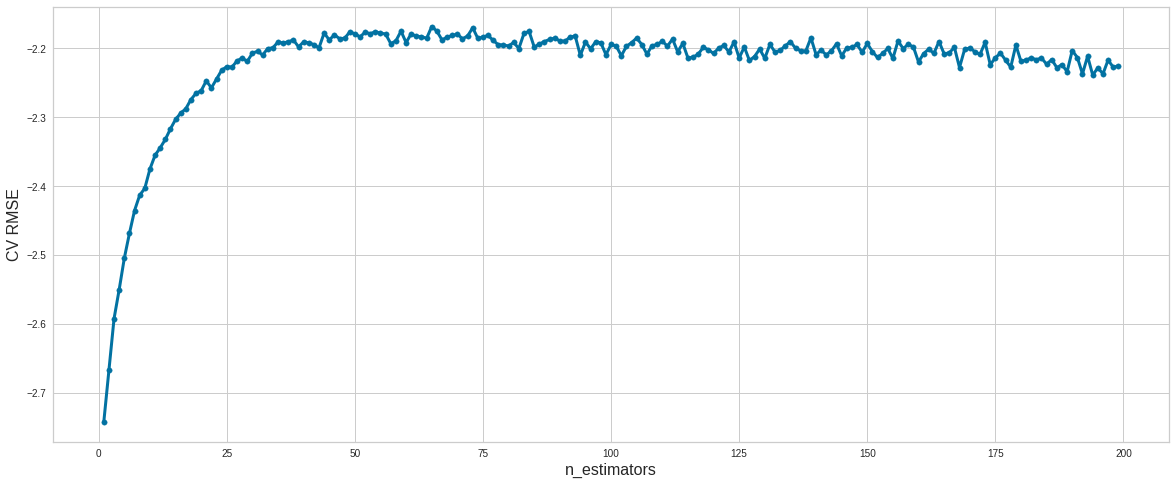

In [ ]:
n_estimators = grid.cv_results_['param_n_estimators'].data
RMSE_scores_boosting = grid.cv_results_['mean_test_score']

plt.figure(figsize=(20, 8))
plt.xlabel('n_estimators', fontsize=16)
plt.ylabel('CV RMSE', fontsize=16)
plt.scatter(n_estimators, RMSE_scores_boosting, s=30)
plt.plot(n_estimators, RMSE_scores_boosting, linewidth=3)
plt.grid(True, which='both')


In [ ]:
gbr_importance = pd.DataFrame({'Feature' : X_train.columns,  
              'Importance score': 100*gbr.feature_importances_}).round(2)
gbr_importance.sort_values('Importance score', ascending=False)

NotFittedError: ignored

### Neural Network Model

In [ ]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(random_state=42, max_iter=500).fit(X_train, y_train)
regr_pred = regr.predict(X_test)

nn_RMSE = mean_squared_error(y_test ,regr_pred, squared=False)
print(f'Neural Network Test RMSE: {nn_RMSE:.4f}')

Neural Network Test RMSE: 2.6911


In [ ]:
cvtest = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
scores.append(cross_val_score(GridSearchCV(estimator=gbr,param_grid=params),
                              X, y, scoring='neg_root_mean_squared_error', cv=cvtest, n_jobs=-1, error_score='raise'))
labels.append('GB')

#Stacking

In [ ]:
#imports
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import RepeatedKFold

In [ ]:
#list of models to evaluate
def get_models():
  models = dict()
  #models['Lin Reg'] = LinearRegression()
  #models['Dec Tree'] = DecisionTreeRegressor()
  models['R Forest'] = RandomForestRegressor()
  models['Grad Boost'] = GradientBoostingRegressor()
  models['NN'] = MLPRegressor()
  models['Stacking'] = get_stacking()
  
  return models

Function for Getting a Stacking Ensemble of Models

In [ ]:
def get_stacking():
  #defining the base models (level 0)
  level0 = list()
  #level0.append(('Linear Regression', LinearRegression()))
  #level0.append(('Decision Tree', DecisionTreeRegressor()))
  level0.append(('Random Forest', RandomForestRegressor(random_state=42)))
  level0.append(('Gradient Boosting', GradientBoostingRegressor()))
  level0.append(('Neural Network', MLPRegressor()))
  #defining meta-learning model (level 1)
  level1 = LinearRegression()
  model = StackingRegressor(estimators = level0, final_estimator = level1, cv = 5)
  return model

Function for Evaluating a Given Model Using Cross Validation

In [ ]:
def evaluate_model(model, X, y):
  cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
  scores = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
  return scores

Results and models list

Running Neural Network on Ideal Parameters

In [ ]:
#Creating Neural Network Database with relevant features
features_list_nn = ['meta_score', 'user_review','is_portable', 'top_5_publisher', 'year',
       'is_not_characterbased', 'platform_3DS', 'platform_DC', 'platform_DS',
       'platform_GBA', 'platform_GC', 'platform_N64', 'platform_PC',
       'platform_PS', 'platform_PS2', 'platform_PS3', 'platform_PS4',
       'platform_PSP', 'platform_PSV', 'platform_Wii', 'platform_WiiU',
       'platform_X360', 'platform_XB', 'platform_XOne', 'month_April',
       'month_August', 'month_December', 'month_February', 'month_January',
       'month_July', 'month_June', 'month_March', 'month_May',
       'month_November', 'month_October', 'month_September', 'Genre_Action',
       'Genre_Adventure', 'Genre_Fighting', 'Genre_Misc', 'Genre_Platform',
       'Genre_Puzzle', 'Genre_Racing', 'Genre_Role-Playing', 'Genre_Shooter',
       'Genre_Simulation', 'Genre_Sports', 'Genre_Strategy']
X_nn = df_cleaned.loc[:, features_list_nn]
y_nn = df_cleaned['Global_Sales']

results.append(evaluate_model(MLPRegressor(), X_nn, y_nn))



>R Forest -1.938 (0.605)
>Grad Boost -1.778 (0.607)
>NN -1.933 (0.579)
>Stacking -1.785 (0.606)


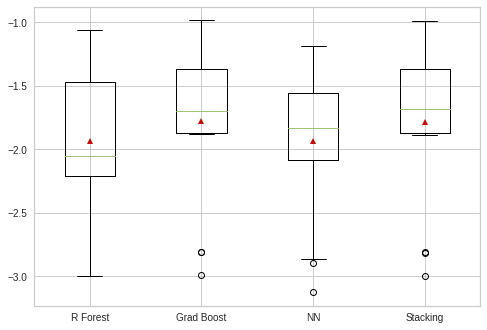

In [ ]:
# compare ensemble to each standalone models for regression
from numpy import mean
from numpy import std
from matplotlib import pyplot

#defining dataset
X, y = X, y 
#get models to evaluate, dictionary of models
models = get_models()
#evaluate models and store results
results, names = list(), list()
for name, model in models.items():
  scores = evaluate_model(model, X, y)
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [ ]:
level0 = list()
level0.append(('Random Forest', RandomForestRegressor(random_state=42)))
level0.append(('Gradient Boosting', GradientBoostingRegressor()))
level0.append(('Neural Network', MLPRegressor()))
# define meta learner model
level1 = LinearRegression()
# define the stacking ensemble
model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
# fit the model on all available data
model.fit(X, y)
# make a prediction for one example
yhat = model.predict(X_test)
mean_squared_error(y_test, yhat, squared=False)

2.381052245995536

In [ ]:
mean_squared_error(y_test, yhat, squared=False)

# train/validate each model w/ topkfeatures for k in (1, 48) to determine best features for each model 

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import array

def get_topk_features(k):
  select = SelectKBest(score_func=f_regression, k=k)
  z = select.fit_transform(X, y) 
  filter = select.get_support()
  return array(features_list)[filter]
  
def get_kfold(model, X):
  cv = KFold(n_splits=10, random_state=1, shuffle=True)
  scores = cross_val_score(model, X, y_train, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
  return -1 * np.mean(scores)

In [ ]:
# finding optimal # of parameters for given model
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

class model:
  def __init__(self, m, name):
    self.model = m
    self.name = name
    self.best_features = None

models = [model(MLPRegressor(random_state=1, max_iter=500), "neural network"), model(GradientBoostingRegressor(),"gradient boosting"),
          model(DecisionTreeRegressor(), "decision tree"), model(RandomForestRegressor(), "random forest"),model(LinearRegression(), "linear regression")]

for model_obj in models:
  best_k = 0
  best_score = 100
  model = model_obj.model
  for k in range(5, 48):
    topkfeatures = get_topk_features(k=k)
    this_X = X[topkfeatures]
    X_train, X_test, y_train, y_test = train_test_split(this_X, y, test_size=0.30, random_state=42)

    #model.fit(X_train, y_train)
    #predictions = model.predict(X_test)
    score = get_kfold(model, X_train)
    if score < best_score:
      best_score = score
      best_k = k
      best_features = topkfeatures
  model_obj.best_features = best_features
  print("with",best_k, "features,", model_obj.name, "achieves", best_score, "rmse in 10 fold cross-validation")

NameError: ignored

In [ ]:
# Test each model w/ best features
print("RMSE BY MODEL USING KFOLD OPTIMAL FEATURES")
for model_obj in models:
  model = model_obj.model
  this_X = X[model_obj.best_features]
  X_train, X_test, y_train, y_test = train_test_split(this_X, y, test_size=0.30, random_state=42)
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  print(model_obj.name + ":", mean_squared_error(y_test, predictions, squared=False))

print("RMSE BY MODEL USING ALL FEATURES")
for model_obj in models:
  model = model_obj.model
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  print(model_obj.name + ":", mean_squared_error(y_test, predictions, squared=False))